<a href="https://colab.research.google.com/github/nagashreem363/Dynamic_pricing/blob/main/Dynamic_pricing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamic Pricing Strategy of Walmart Data**

In this project, we explore a retail dataset sourced from GitHub, specifically containing Walmart product data. The datasetcovering various aspects of Walmart’s inventory, represents a product with multiple features that help us understand product trends and behavior in the market.

The primary goal of this project is to perform Exploratory Data Analysis (EDA) to identify patterns and trends in the data and then build a machine learning model that can predict the optimal selling price for a given product.

**Problem Statement**

Analyze the product data to identify trends and patterns, and develop a predictive model that recommends a selling price for any given product in such a way that it helps increase revenue while remaining market-relevant.

Retailers like Walmart deal with thousands of products, each with different pricing strategies. Accurately pricing these products is crucial to maximize sales and revenue while staying competitive in the market. Given a dataset of Walmart product listings with various attributes. By the end of this notebook, we aim to create a system where, after entering product-specific details (such as category, brand, features, etc.), the model will predict an optimal selling price—serving as a valuable tool for revenue enhancement and data-driven pricing strategy.



**About the Dataset:**

The dataset used in this project contains product-level data from Walmart, collected from a GitHub source. It comprises approximately 10,000 entries representing a diverse range of retail products, with information mainly from the year 2022, along with a few entries from early 2023.

Each row in the dataset corresponds to an individual product listing and includes various features that influence customer purchasing behavior and pricing decisions.

 **Key Features of the Dataset:**

1.SHIPPING_LOCATION: City code where the product is shipped from.

2.State: The U.S. state associated with the shipping location.

3.Country: The country (likely always USA in this case).

4.DEPARTMENT: Main product department (e.g., Electronics, Home, Fashion).

5.CATEGORY: Specific product category within the department.

6.SUBCATEGORY: More detailed classification of the product.

7.BREADCRUMBS: Full product path (Department > Category > Subcategory).

8.SKU: Unique product ID or stock-keeping unit.

PRODUCT_URL: Web link to the product’s listing.

9.PRODUCT_NAME: Name or title of the product.

10.BRAND: Manufacturer or brand of the product.

11.PRICE_RETAIL: Original price (MRP) before any discount.

12.PRICE_CURRENT: Current selling price after discount.

13.PRODUCT_SIZE: Size or quantity of the product (e.g., 250ml, Pack of 2).

14.PROMOTION: Any ongoing discount or promotional offer.

15.RunDate: The date when the data was recorded.

16.Month: Month extracted from the RunDate.

17.Season: Season of the year (Spring, Summer, Fall, Winter) based on the date.

**Exploratory Data Analysis for Dynamic Pricing Strategies**

1. Data Loading
1. Data Preprocessing
2. EDA

**Data Loading**

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data=pd.read_csv('/content/walmart_data_updated.csv')
raw_data.sample(4)

The Shipping location is indicated with the City Code and even the City Name is simultaneoulsy mentioned in the futher column



In [ ]:
raw_data.info()
raw_data.isnull().sum()

As subcategory column is completely null, I plan to remove this in the current analysis as it don’t not add any value

In [ ]:
columns_to_keep=["SHIPPING_LOCATION","DEPARTMENT","CATEGORY","SKU","PRODUCT_NAME","Country","State","PRODUCT_SIZE","BRAND","PRICE_RETAIL","PRICE_CURRENT","RunDate","PROMOTION","Season"]


In [ ]:
raw_data=raw_data[columns_to_keep]
raw_data.sample(3)


Converting the datatype of 'RunDate' from object to Datetime

In [ ]:
raw_data['RunDate'] = pd.to_datetime(raw_data['RunDate'], format='%d-%m-%Y')
raw_data.info()

Extracting Month and year columns

In [ ]:
raw_data['month_name'] = raw_data['RunDate'].dt.strftime('%B')
raw_data['year'] = raw_data['RunDate'].dt.year

raw_data.sample(3)

In [ ]:
raw_data.to_csv('cleaned_data.csv',index=False)
cleaned_data=pd.read_csv('/content/cleaned_data.csv')
cleaned_data.sample(3)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
cleaned_data.describe()

/tmp/ipython-input-98-1030658245.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=cleaned_data, order=cleaned_data['Country'].value_counts().index, ax=axes[0], palette='viridis')
/tmp/ipython-input-98-1030658245.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=cleaned_data, order=cleaned_data['State'].value_counts().index, ax=axes[1], palette='magma')
/tmp/ipython-input-98-1030658245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DEPARTMENT', data=cleaned_data, order=cleaned_data['DEPA

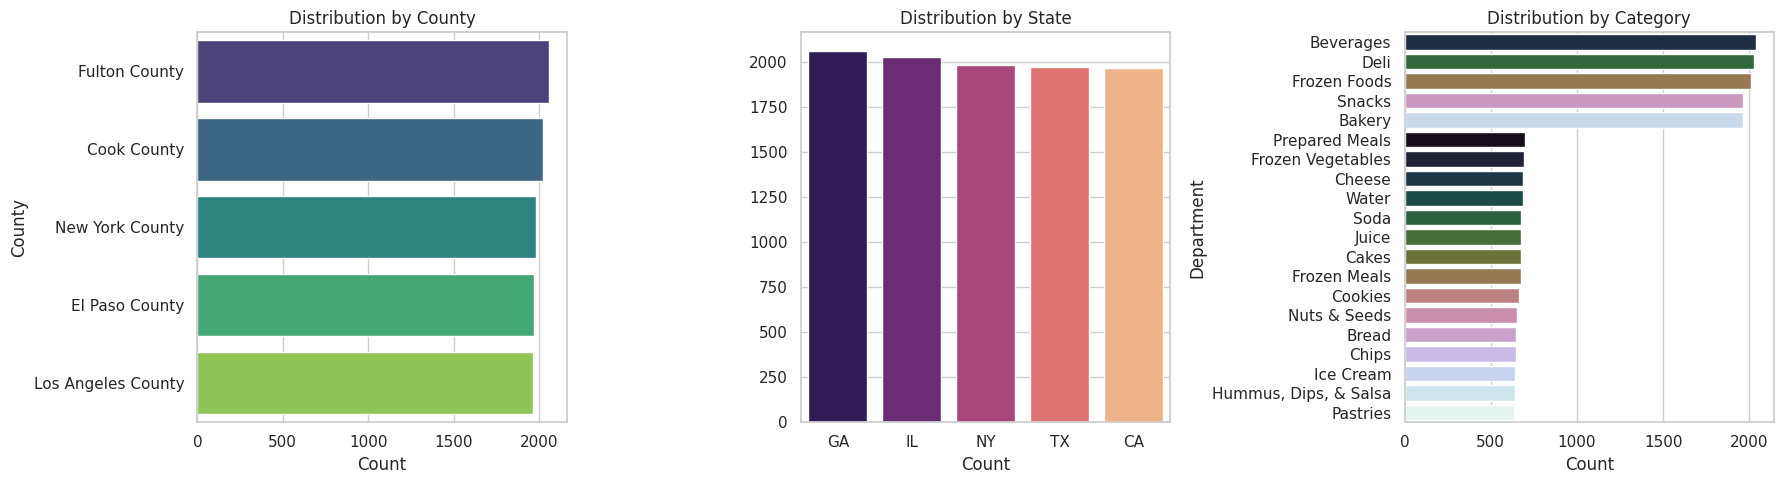

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Country Distribution
sns.countplot(y='Country', data=cleaned_data, order=cleaned_data['Country'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution by County')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('County')

# State Distribution
sns.countplot(x='State', data=cleaned_data, order=cleaned_data['State'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Distribution by State')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')

# Department Distribution
sns.countplot(y='DEPARTMENT', data=cleaned_data, order=cleaned_data['DEPARTMENT'].value_counts().index, ax=axes[2], palette='cubehelix')
axes[2].set_title('Distribution by Department')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Department')

#Category Distribution
sns.countplot(y='CATEGORY', data=cleaned_data, order=cleaned_data['CATEGORY'].value_counts().index, ax=axes[2], palette='cubehelix')
axes[2].set_title('Distribution by Category')

# Adjust layout
plt.tight_layout()
plt.show()

County: Walmart data is evenly distributed across all five counties.

State: Georgia (GA) has the highest count, while California (CA) has the lowest.

Category: Beverages, Deli, Frozen Foods, Snacks, and Bakery are the top product categories.

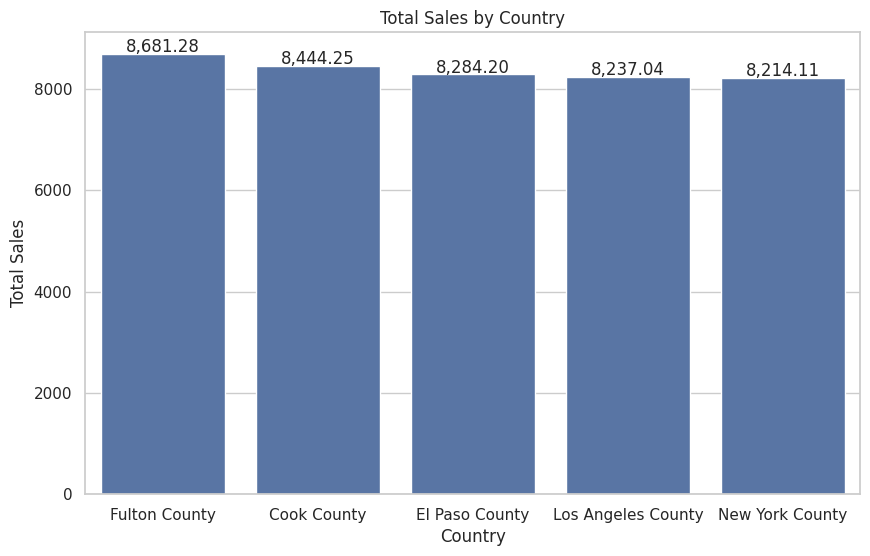

In [80]:
country_sales = cleaned_data.groupby('Country')['PRICE_CURRENT'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_sales.index, y=country_sales.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

By this graph we observe that Fulton Country and Cook Country has the highest sales

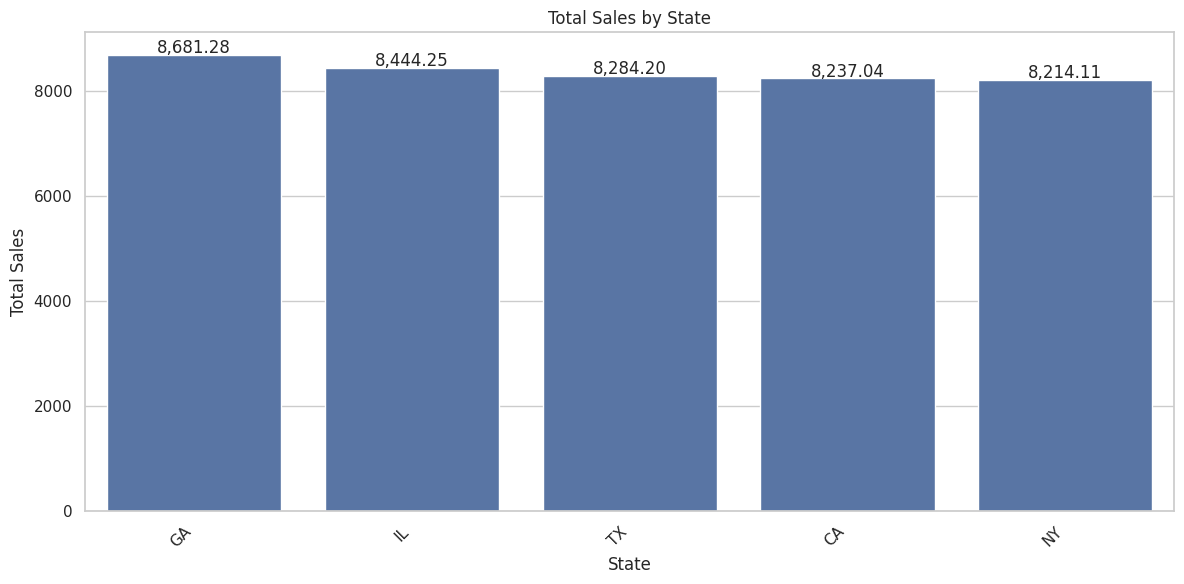

In [81]:
state_sales = cleaned_data.groupby('State')['PRICE_CURRENT'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=state_sales.index, y=state_sales.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Georgia and  Illinois are the states with highest sales

/tmp/ipython-input-82-1748526409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Season', y='PRICE_CURRENT', data=sales_by_season, palette='viridis')


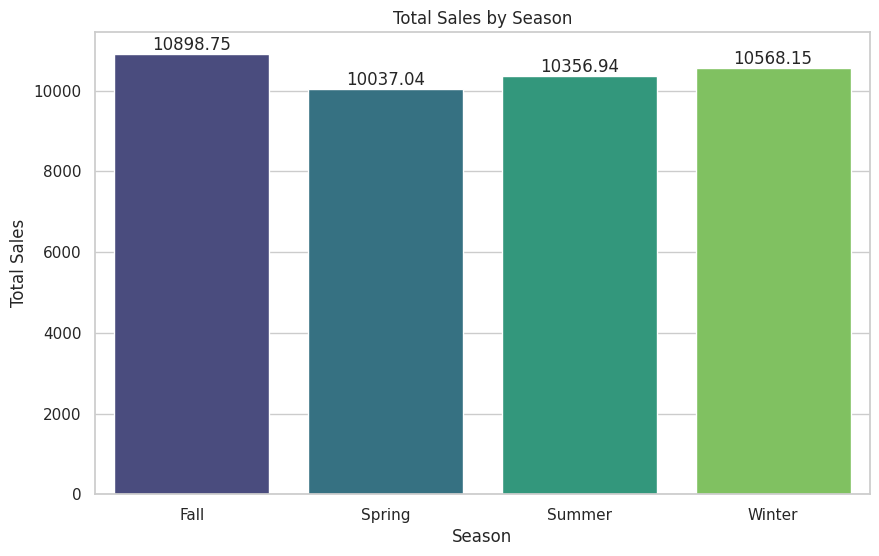

Season with the highest sales:
Season               Fall
PRICE_CURRENT    10898.75
Name: 0, dtype: object


In [82]:
sales_by_season = cleaned_data.groupby('Season')['PRICE_CURRENT'].sum().reset_index()
highest_sales_season = sales_by_season.sort_values(by='PRICE_CURRENT', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='PRICE_CURRENT', data=sales_by_season, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()
print("Season with the highest sales:")
print(highest_sales_season.iloc[0])

The season with the highest total sales is Fall, with total sales of 10,898.75. This is followed by Winter (10,568.15), Summer (10,356.94), and Spring (10,037.04)

/tmp/ipython-input-83-2508728361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories


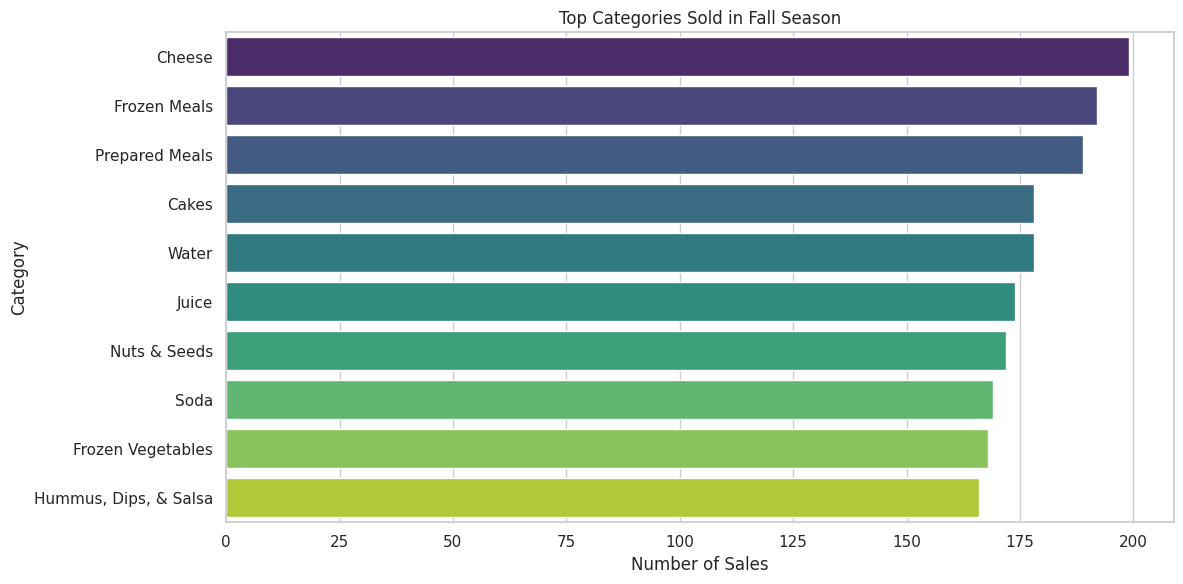

/tmp/ipython-input-83-2508728361.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products


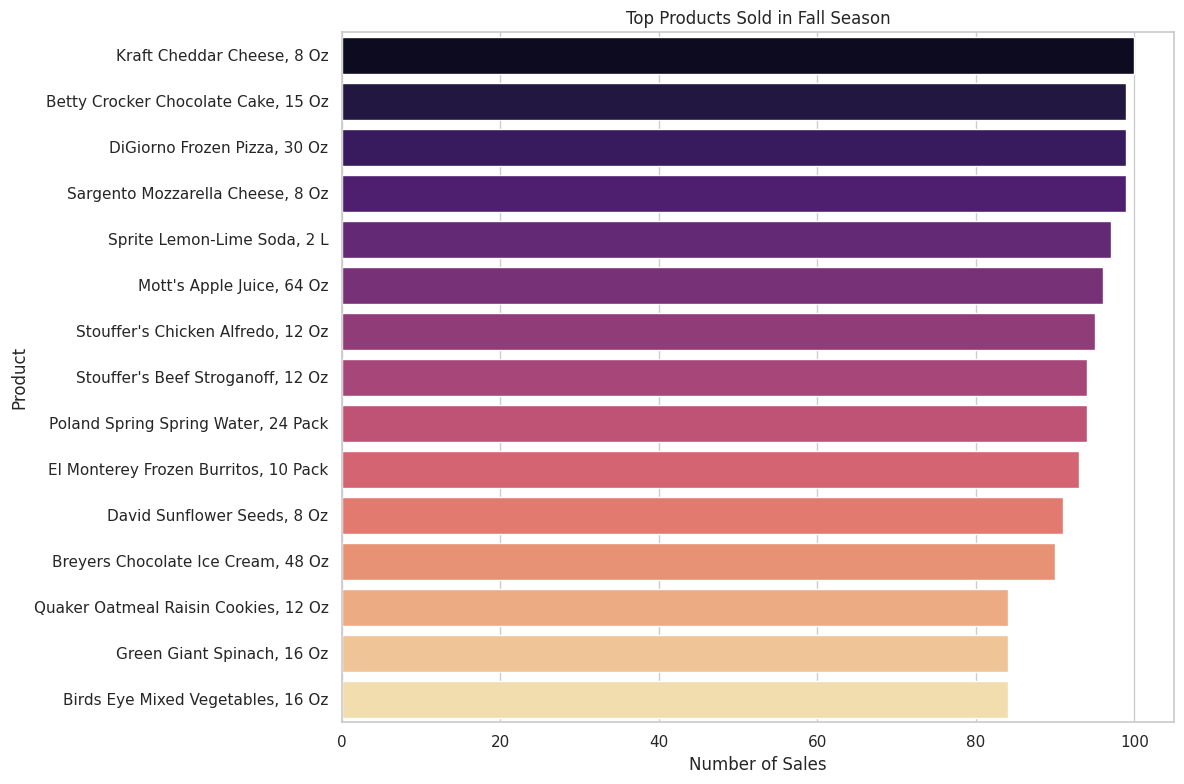

In [83]:
fall_data = cleaned_data[cleaned_data['Season'] == 'Fall']

# Count the occurrences of each category and product in Fall
fall_category_counts = fall_data['CATEGORY'].value_counts().reset_index()
fall_category_counts.columns = ['Category', 'Count']

fall_product_counts = fall_data['PRODUCT_NAME'].value_counts().reset_index()
fall_product_counts.columns = ['Product', 'Count']

# Plotting categories sold in Fall
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories
plt.title('Top Categories Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Plotting products sold in Fall
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products
plt.title('Top Products Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Top category and the Products sold in fall Season was'"cheese" and "Kraft Cheddar Cheese"

The category with the highest sales is: Frozen Meals
Total sales in this category: 4867.77


/tmp/ipython-input-84-421942905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE_CURRENT', y='CATEGORY', data=top_categories, palette='viridis')


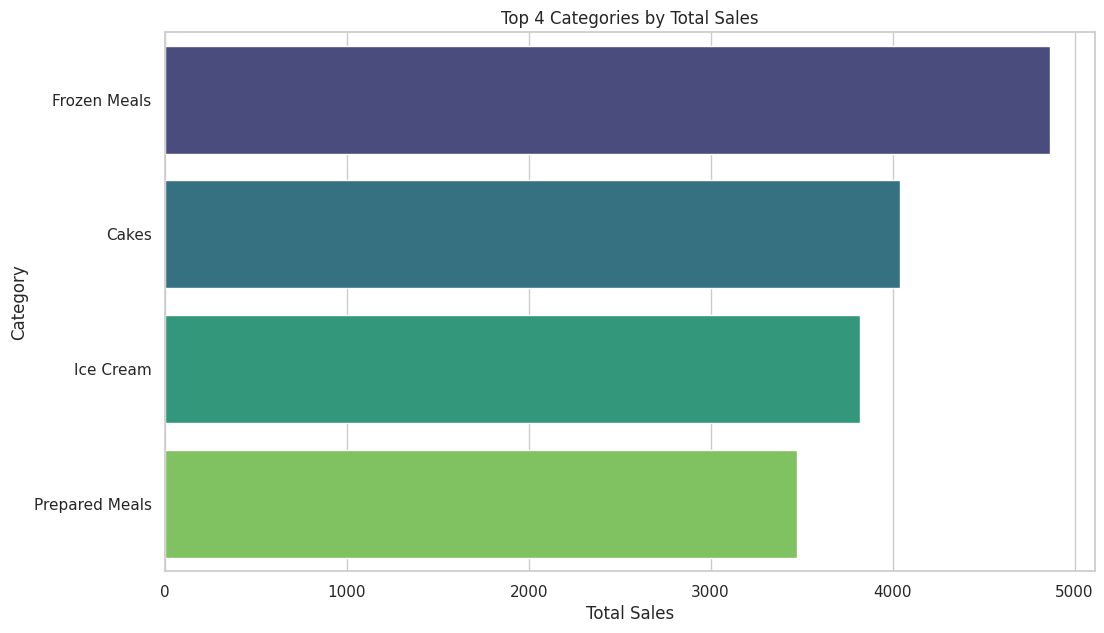

In [84]:
category_sales = cleaned_data.groupby('CATEGORY')['PRICE_CURRENT'].sum().reset_index()
highest_sales_category = category_sales.sort_values(by='PRICE_CURRENT', ascending=False).iloc[0]

print(f"The category with the highest sales is: {highest_sales_category['CATEGORY']}")
print(f"Total sales in this category: {highest_sales_category['PRICE_CURRENT']:.2f}")
top_n =4
top_categories = category_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(top_n)

plt.figure(figsize=(12, 7))
sns.barplot(x='PRICE_CURRENT', y='CATEGORY', data=top_categories, palette='viridis')
plt.title(f'Top {top_n} Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

'Frozen Meals' and Cakes' are the top 2 categories sold in the year 2022

/tmp/ipython-input-85-625901390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')


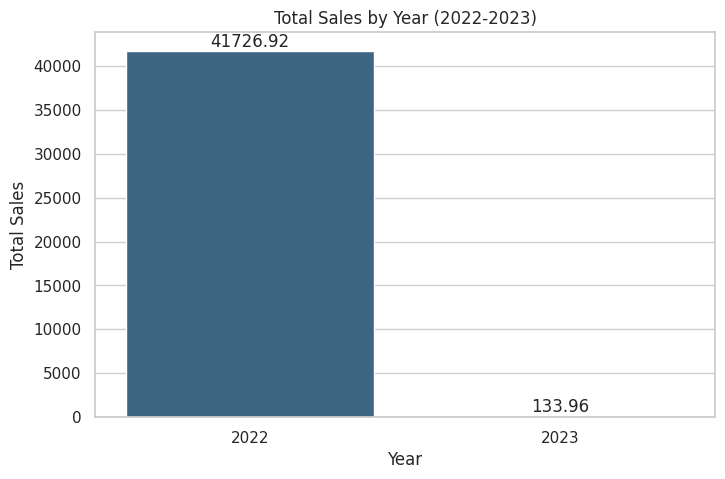

In [85]:
sales_2022_2023 = cleaned_data[cleaned_data['year'].isin([2022, 2023])]
total_sales_by_year = sales_2022_2023.groupby('year')['PRICE_CURRENT'].sum().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Year (2022-2023)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0) # Ensure years are displayed horizontally
plt.show()

The sales data primarily represents the year 2022, with a total of 41,726.92 in sales. The value shown for 2023 (133.96) is extremely low, indicating that complete sales data for 2023 is not available. The recorded sales for 2023 likely represent only the beginning of the year, rather than the full period.

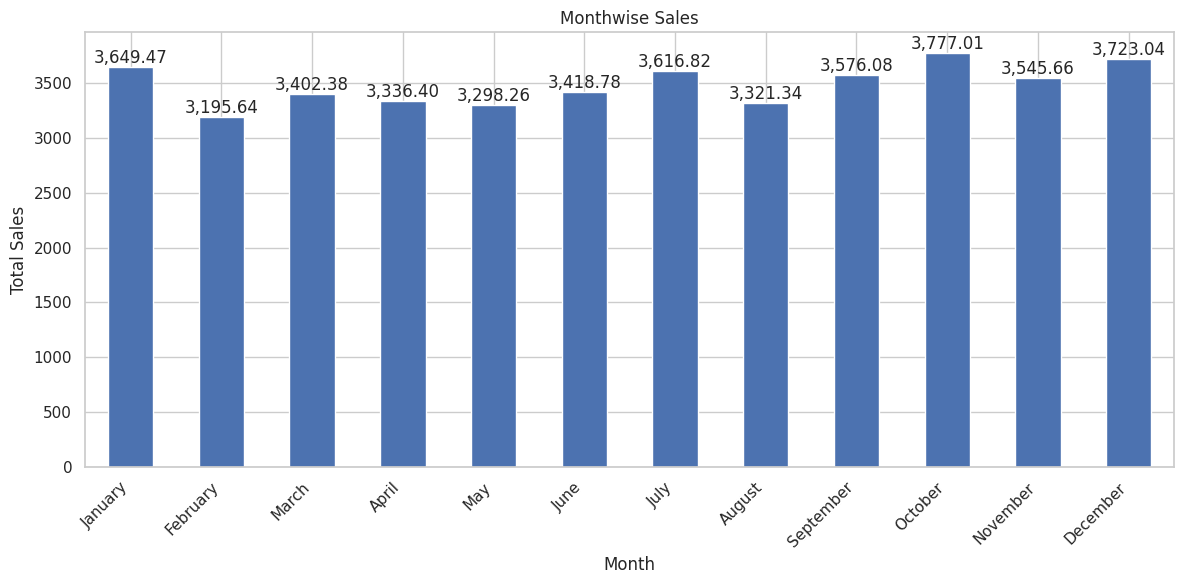

In [86]:
cleaned_data['RunDate'] = pd.to_datetime(cleaned_data['RunDate'])
cleaned_data['Month'] = cleaned_data['RunDate'].dt.strftime('%B')
monthly_sales = cleaned_data.groupby('Month')['PRICE_CURRENT'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
ax = monthly_sales.plot(kind='bar')
plt.title('Monthwise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom') # Added the missing parenthesis here
plt.tight_layout()
plt.show()


Total Sales throughout the year is similar

/tmp/ipython-input-87-4124959862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BRAND', y='PRICE_CURRENT', data=top_3_brands, palette='viridis')


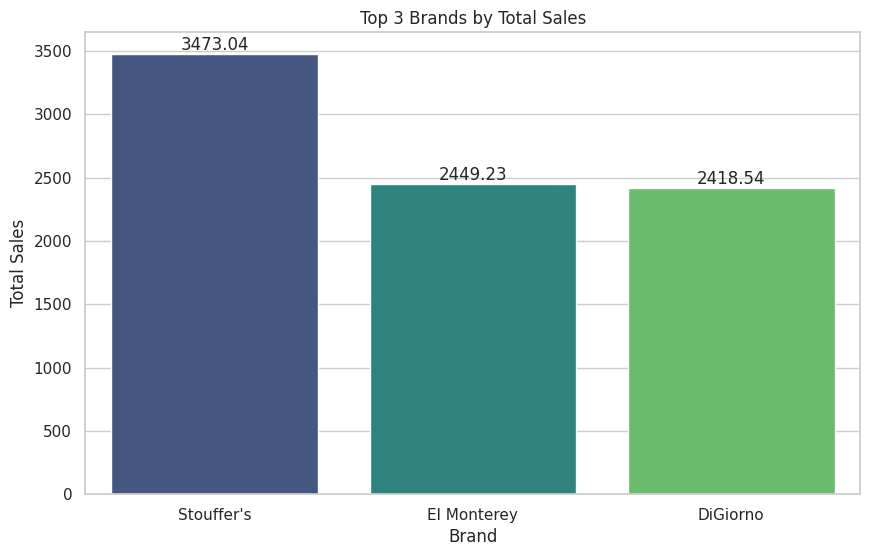

In [87]:
brand_sales = cleaned_data.groupby('BRAND')['PRICE_CURRENT'].sum().reset_index()
top_3_brands = brand_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(3)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BRAND', y='PRICE_CURRENT', data=top_3_brands, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Top 3 Brands by Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

These are the Top 3 brands that were sold in the year 2022

In [88]:
cleaned_data.head(5)
df=cleaned_data[['SHIPPING_LOCATION','PRODUCT_NAME','BRAND','PROMOTION','Season','PRICE_CURRENT','PRICE_RETAIL','PRODUCT_SIZE','PRODUCT_NAME']]
df

,SHIPPING_LOCATION,PRODUCT_NAME,BRAND,PROMOTION,Season,PRICE_CURRENT,PRICE_RETAIL,PRODUCT_SIZE,PRODUCT_NAME
0,90001,"Stouffer's Chicken Alfredo, 12 Oz",Stouffer's,Regular,Summer,4.99,4.99,12,"Stouffer's Chicken Alfredo, 12 Oz"
1,30301,"Tropicana Orange Juice, 64 Oz",Tropicana,Regular,Summer,3.99,3.99,64,"Tropicana Orange Juice, 64 Oz"
2,79936,"Stouffer's Chicken Alfredo, 12 Oz",Stouffer's,Regular,Spring,4.99,4.99,12,"Stouffer's Chicken Alfredo, 12 Oz"
3,79936,"Duncan Hines Vanilla Cake, 15 Oz",Duncan Hines,Regular,Winter,5.99,5.99,15,"Duncan Hines Vanilla Cake, 15 Oz"
4,30301,"Haagen-Dazs Vanilla Ice Cream, 14 Oz",Haagen-Dazs,Regular,Spring,4.99,4.99,14,"Haagen-Dazs Vanilla Ice Cream, 14 Oz"
...,...,...,...,...,...,...,...,...,...
9995,90001,"Quaker Oatmeal Raisin Cookies, 12 Oz",Quaker,Regular,Spring,4.29,4.29,12,"Quaker Oatmeal Raisin Cookies, 12 Oz"
9996,30301,"Kraft Cheddar Cheese, 8 Oz",Kraft,Regular,Fall,3.49,3.49,8,"Kraft Cheddar Cheese, 8 Oz"
9997,10001,"Kraft Cheddar Cheese, 8 Oz",Kraft,Regular,Winter,3.49,3.49,8,"Kraft Cheddar Cheese, 8 Oz"
9998,90001,"Stouffer's Chicken Alfredo, 12 Oz",Stouffer's,Regular,Summer,4.99,4.99,12,"Stouffer's Chicken Alfredo, 12 Oz"


In [89]:
df['IsWinter']=(df['Season']=='Winter').astype(int)
df['IsSummer']=(df['Season']=='Summer').astype(int)
df['IsSpring']=(df['Season']=='Spring').astype(int)
df['IsRainFall']=(df['Season']=='Fall').astype(int)
df.head(3)

/tmp/ipython-input-89-3247984050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsWinter']=(df['Season']=='Winter').astype(int)
/tmp/ipython-input-89-3247984050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsSummer']=(df['Season']=='Summer').astype(int)
/tmp/ipython-input-89-3247984050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,SHIPPING_LOCATION,PRODUCT_NAME,BRAND,PROMOTION,Season,PRICE_CURRENT,PRICE_RETAIL,PRODUCT_SIZE,PRODUCT_NAME,IsWinter,IsSummer,IsSpring,IsRainFall
0,90001,"Stouffer's Chicken Alfredo, 12 Oz",Stouffer's,Regular,Summer,4.99,4.99,12,"Stouffer's Chicken Alfredo, 12 Oz",0,1,0,0
1,30301,"Tropicana Orange Juice, 64 Oz",Tropicana,Regular,Summer,3.99,3.99,64,"Tropicana Orange Juice, 64 Oz",0,1,0,0
2,79936,"Stouffer's Chicken Alfredo, 12 Oz",Stouffer's,Regular,Spring,4.99,4.99,12,"Stouffer's Chicken Alfredo, 12 Oz",0,0,1,0


**Summary**

**1. Geographical Sales Distribution**

Sales are fairly balanced across counties like Fulton, Cook, and New York County, with slightly higher concentration in urban-dense regions.

Georgia (GA) leads in state-wise sales, potentially due to its larger number of stores or customer base, while California, despite being populous, shows slightly lower volumes—this could indicate competitive pricing or brand saturation in CA.

**2. Seasonal Trends and Monthly Correlation**

Fall season (Sept–Nov) sees the highest spike in sales across many states, particularly in NY and GA. This could be linked to holiday preparation (Thanksgiving, Halloween) and increased demand for grocery items like frozen foods and bakery goods.

**3.Department Performance**

Departments like Beverages, Deli, Snacks, and Frozen Foods outperform others.This can be attributed to:
*   Daily consumable nature (beverages, snacks),
*   Convenience buying behavior (deli and frozen foods),
*   Promotion-driven purchasing during specific months/seasons.

**4. Brand-Level Insight – Why Stouffer’s Performs Well**

Stouffer’s is a popular frozen food brand known for ready-to-eat meals (lasagna, mac & cheese, etc.).

Its strong performance is likely due to:
*   
Placement in the Frozen Foods department, which already shows high demand,
*  Affordable, family-sized packaging that appeals to value shoppers,
*   Brand loyalty and wide distribution in high-sales states like GA and TX.















